* [Linear Regression using PyTorch](https://www.geeksforgeeks.org/linear-regression-using-pytorch)

In [1]:
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()

from IPython.display import clear_output
clear_output()

import torch
rooms = torch.Tensor(boston.data[:,5])
price = torch.Tensor(boston.target)

In [2]:
# define model
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
# our model
model = LinearRegressionModel()

In [3]:
# define loss and optim (how weights are updated)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
accuracy = []

In [4]:
for epoch in range(5000):
 
    # Forward pass: Compute predicted y by passing x to the model
    # unsqueeze(-1): mat1 and mat2 shapes cannot be multiplied (1x506 and 1x1)
    pred_y = model(rooms.unsqueeze(-1))
 
    # Compute and print loss
    # squeeze(1): Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])).
    loss = criterion(pred_y.squeeze(1), price)
 
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    accuracy.append(loss.item())
    if epoch % 100 == 0:  print('epoch {}, loss {}'.format(epoch, loss.item())) 

epoch 0, loss 476.5987548828125
epoch 100, loss 58.436187744140625
epoch 200, loss 57.739471435546875
epoch 300, loss 57.07548904418945
epoch 400, loss 56.44268798828125
epoch 500, loss 55.839595794677734
epoch 600, loss 55.26482391357422
epoch 700, loss 54.7170524597168
epoch 800, loss 54.195003509521484
epoch 900, loss 53.69746780395508
epoch 1000, loss 53.22329330444336
epoch 1100, loss 52.771400451660156
epoch 1200, loss 52.340721130371094
epoch 1300, loss 51.930267333984375
epoch 1400, loss 51.539085388183594
epoch 1500, loss 51.166282653808594
epoch 1600, loss 50.81098175048828
epoch 1700, loss 50.47236251831055
epoch 1800, loss 50.149654388427734
epoch 1900, loss 49.842098236083984
epoch 2000, loss 49.548980712890625
epoch 2100, loss 49.269630432128906
epoch 2200, loss 49.00339889526367
epoch 2300, loss 48.74967956542969
epoch 2400, loss 48.50786590576172
epoch 2500, loss 48.277408599853516
epoch 2600, loss 48.057777404785156
epoch 2700, loss 47.84845733642578
epoch 2800, loss 4

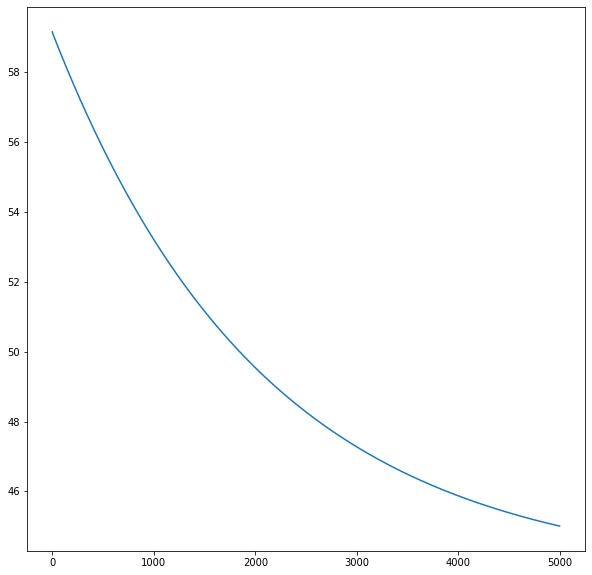

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(accuracy[3:])

In [6]:
test_rooms = torch.Tensor([8.0])
pred_y = model(test_rooms)
print(pred_y.item())

35.394859313964844


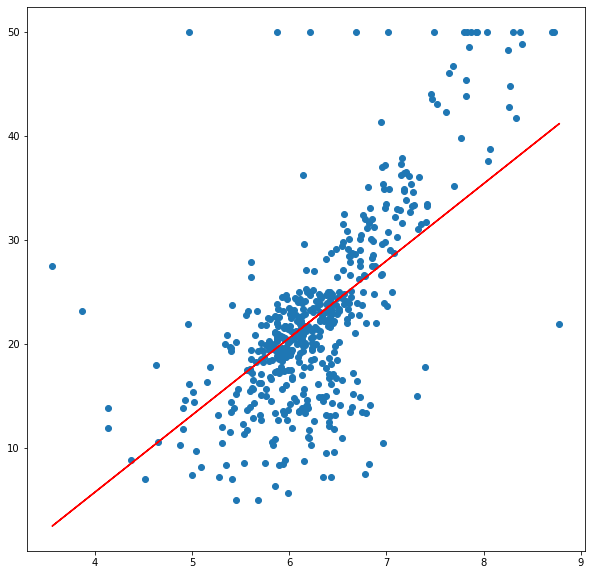

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(rooms,price)

#add line of best fit to plot
neuron = model.linear.state_dict()
plt.plot(rooms, neuron['weight'].item() * rooms + neuron['bias'].item(), '-r')